In [5]:
# import relevant libraries
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# set path to Figures
figures = os.path.join(os.getcwd(), 'Figures')
if not os.path.exists(figures):
    os.makedirs(figures)

# set style for seaborn and size of figures
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [9, 6]

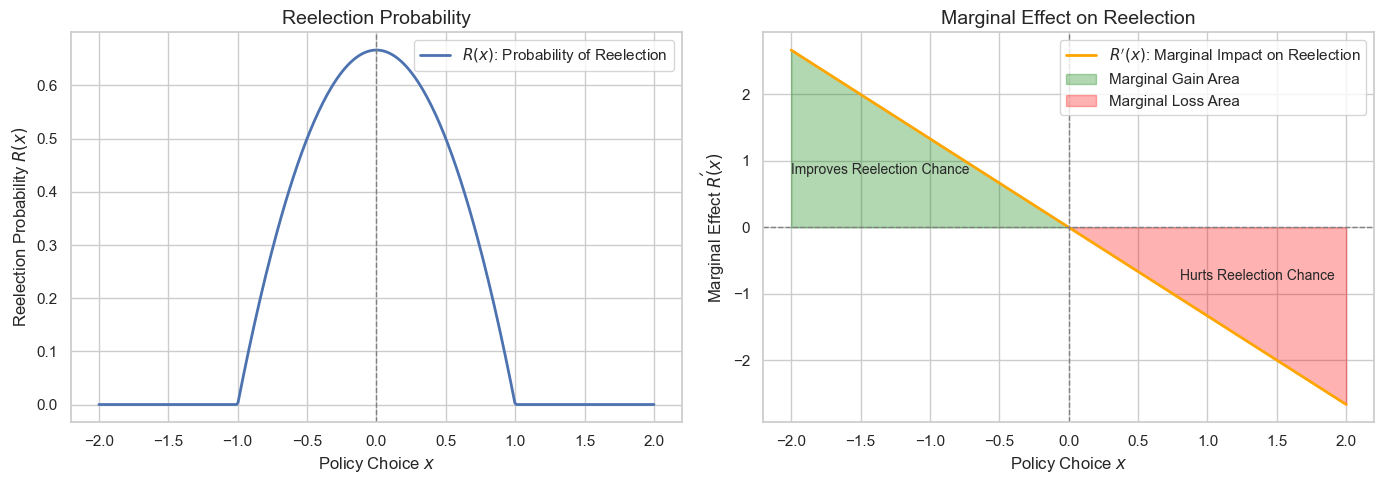

In [13]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Re-define x
x = np.linspace(-2, 2, 400)
k = 0.5

# Define R(x) and its derivative R'(x)
R_x = 1 - (k + x**2) / (1 + k)
R_x = np.clip(R_x, 0, 1)
R_prime_x = -2 * x / (1 + k)

# Plot R(x)
ax1.plot(x, R_x, label=r"$R(x)$: Probability of Reelection", linewidth=2)
ax1.axvline(0, color='grey', linestyle='--', linewidth=1)
ax1.set_xlabel(r'Policy Choice $x$', fontsize=12)
ax1.set_ylabel(r'Reelection Probability $R(x)$', fontsize=12)
ax1.set_title('Reelection Probability', fontsize=14)
ax1.grid(True)
ax1.legend()

# Plot R'(x) with shading and annotation
ax2.plot(x, R_prime_x, label=r"$R'(x)$: Marginal Impact on Reelection", color='orange', linewidth=2)
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)
ax2.axvline(0, color='grey', linestyle='--', linewidth=1)

# Highlight positive and negative regions
ax2.fill_between(x, R_prime_x, 0, where=(x<0), interpolate=True, color='green', alpha=0.3, label="Marginal Gain Area")
ax2.fill_between(x, R_prime_x, 0, where=(x>0), interpolate=True, color='red', alpha=0.3, label="Marginal Loss Area")

# Annotations
ax2.annotate('Improves Reelection Chance', xy=(-1, 0.5), xytext=(-2, 0.8), fontsize=10)
ax2.annotate('Hurts Reelection Chance', xy=(1, -0.5), xytext=(0.8, -0.8), fontsize=10)

ax2.set_xlabel(r'Policy Choice $x$', fontsize=12)
ax2.set_ylabel(r'Marginal Effect $R\'(x)$', fontsize=12)
ax2.set_title('Marginal Effect on Reelection', fontsize=14)
ax2.grid(True)
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(figures, 'reelection_probability.png'), dpi=300)
plt.show()